In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Load the Stata file into a DataFrame
df = pd.read_stata('country_v11.dta')
# Display the first few rows of the DataFrame
print(df.head())

df.to_csv('country_v11.csv', index=False)
# Display the first few rows of the DataFrame after conversion

       country isocode  patience  risktaking  posrecip  negrecip  altruism  \
0  Afghanistan     AFG -0.201360    0.120764  0.289641  0.254712  0.166455   
1      Algeria     DZA  0.059815    0.391530 -0.598255  0.254901 -0.009968   
2    Argentina     ARG -0.229308    0.041503  0.159679 -0.140457  0.027347   
3    Australia     AUS  0.657004    0.137137  0.069660  0.022190  0.155331   
4      Austria     AUT  0.608285   -0.061829  0.161047 -0.055415 -0.035363   

      trust  
0  0.315964  
1 -0.177371  
2 -0.206733  
3  0.298973  
4  0.154628  


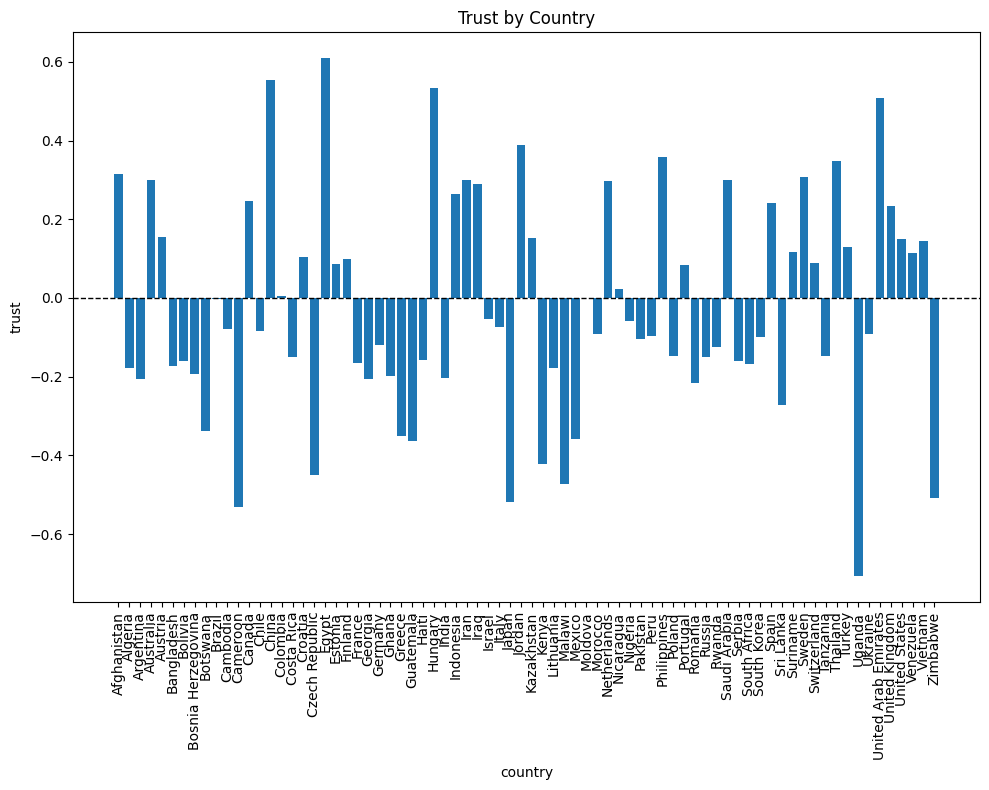

In [3]:
Trust_per_country = df[['country', 'trust']].dropna()

plt.figure(figsize=(10, 8))
plt.bar(Trust_per_country['country'], Trust_per_country['trust'])
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Trust by Country')
plt.xlabel('country')
plt.ylabel('trust')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

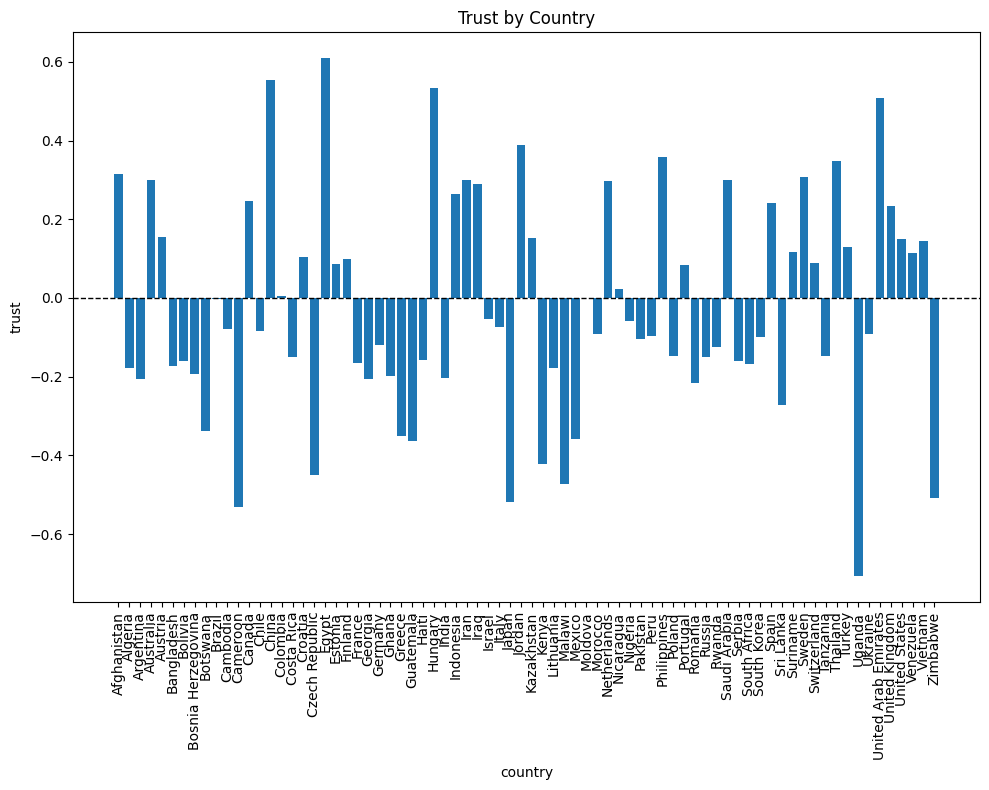

In [4]:
Trust_per_country = df[['country', 'trust']].dropna()

plt.figure(figsize=(10, 8))
plt.bar(Trust_per_country['country'], Trust_per_country['trust'])
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Trust by Country')
plt.xlabel('country')
plt.ylabel('trust')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/41/40w2gysj74scywbtgxgtm_bw0000gn/T/ipykernel_29010/567233611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= risk_per_country, x='country', y='risktaking', palette='viridis')


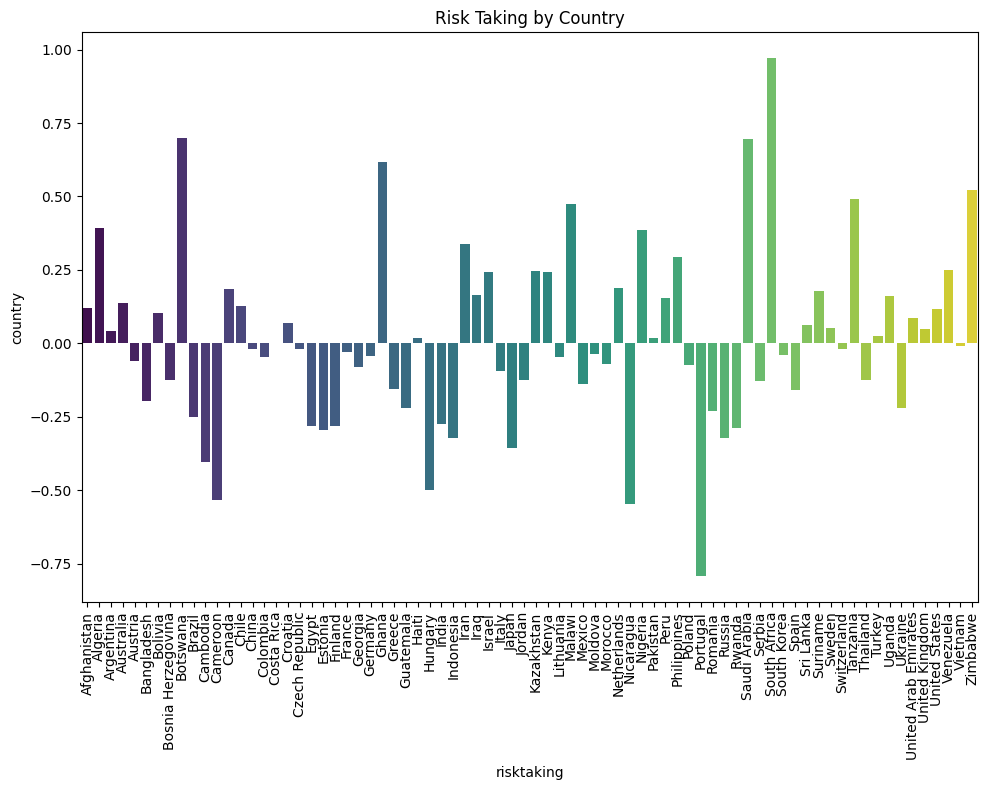

In [5]:
risk_per_country = df[['country', 'risktaking']].dropna()

plt.figure(figsize=(10, 8))
sns.barplot(data= risk_per_country, x='country', y='risktaking', palette='viridis')
plt.xlabel('risktaking')
plt.ylabel('country')
plt.title('Risk Taking by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

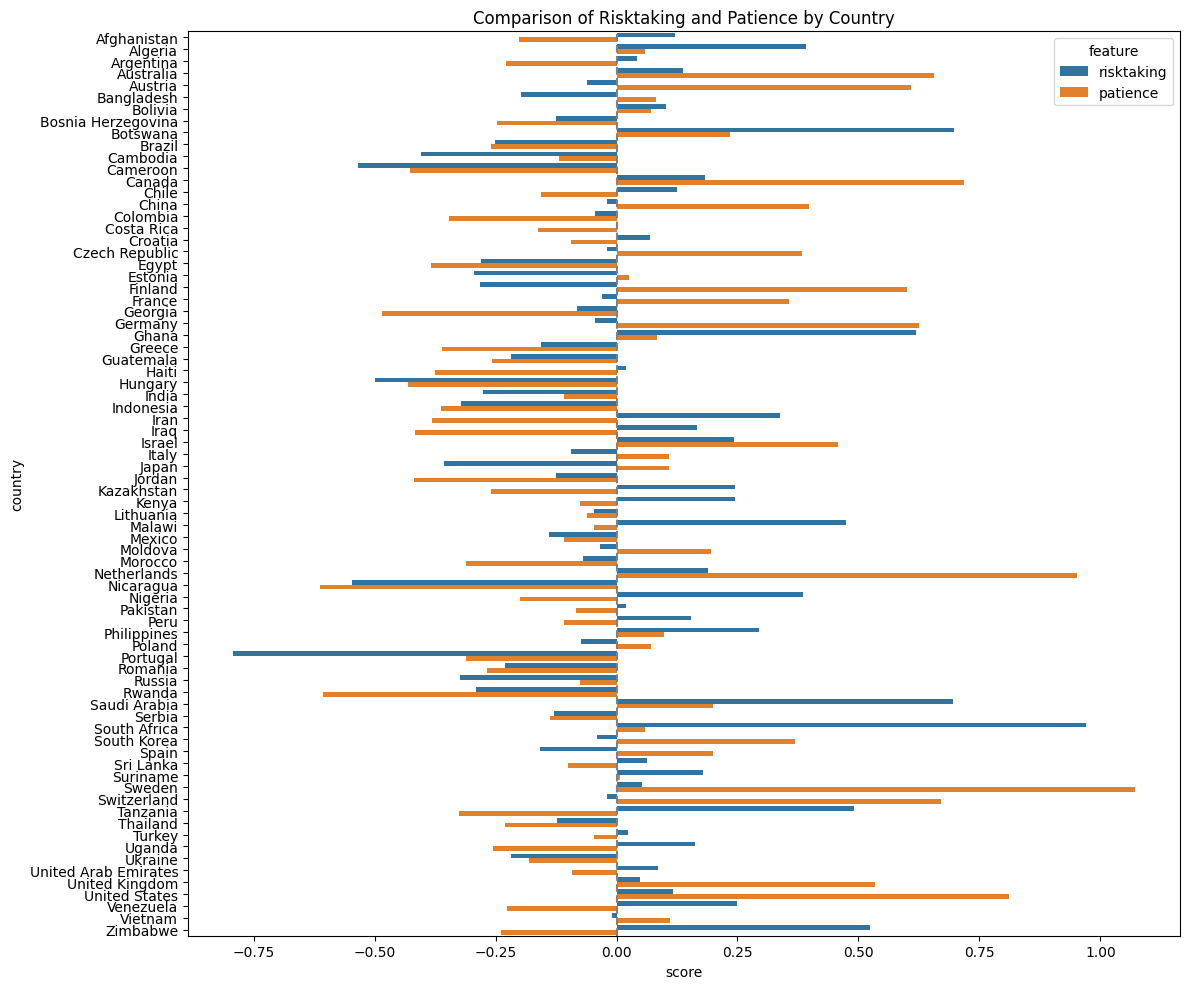

In [6]:
data = df[['country', 'risktaking', 'patience']].dropna()
data_long = data.melt(id_vars='country', value_vars=['risktaking', 'patience'],
                      var_name='feature', value_name='score')



plt.figure(figsize=(12, 10))
sns.barplot(data=data_long, x='score', y='country', hue='feature')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Comparison of Risktaking and Patience by Country')
plt.tight_layout()
plt.show()


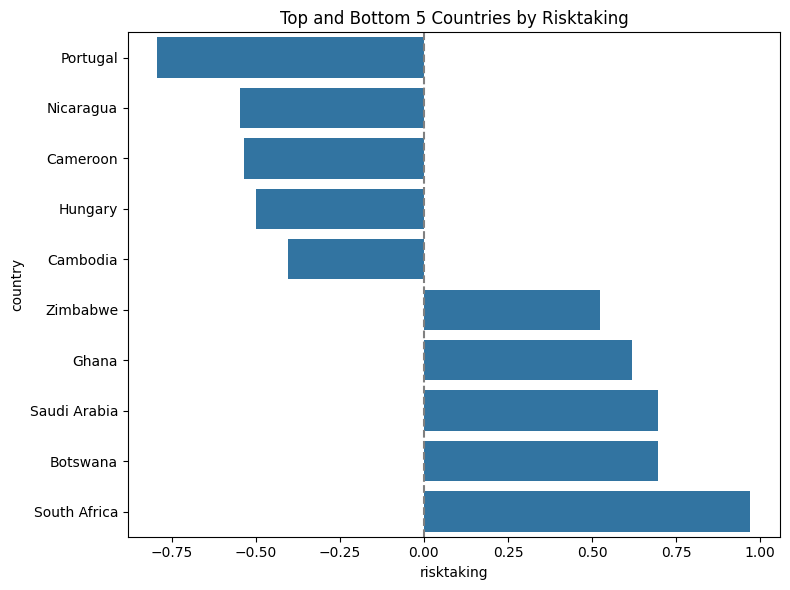

In [7]:
# Drop missing values
data = df[['country', 'risktaking']].dropna()

# Sort by risktaking
sorted_data = data.sort_values('risktaking')

# Select bottom 5 and top 5
limited_data = pd.concat([sorted_data.head(5), sorted_data.tail(5)])



plt.figure(figsize=(8, 6))
sns.barplot(data=limited_data, x='risktaking', y='country')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top and Bottom 5 Countries by Risktaking')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Risk taking')

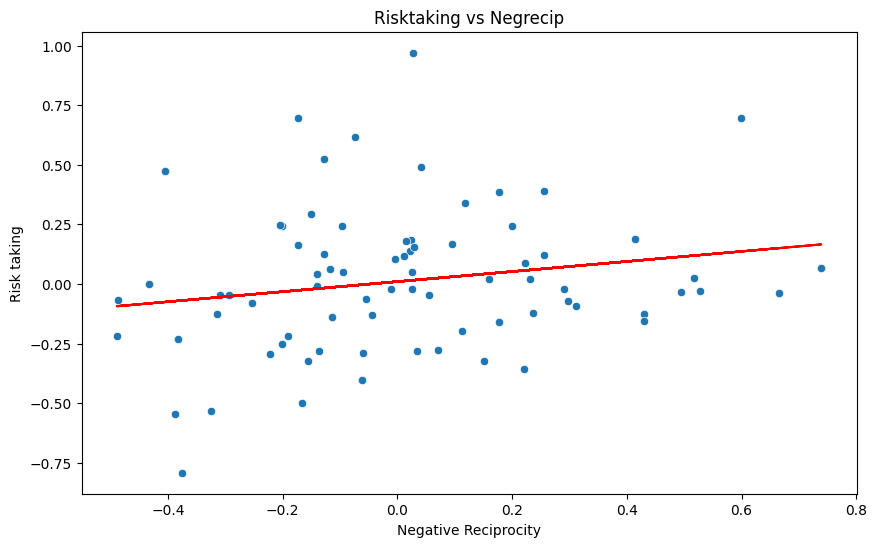

In [8]:
data = df[['negrecip', 'risktaking']].dropna()
# Fit a linear regression model
model = LinearRegression()
X = data[['negrecip']]
y = data['risktaking']
model.fit(X, y)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='negrecip', y='risktaking')
plt.plot(data['negrecip'], model.predict(X), color='red', label='Regression Line')
plt.title('Risktaking vs Negrecip')
plt.xlabel('Negative Reciprocity')
plt.ylabel('Risk taking')

In [12]:
results = linregress(data['negrecip'], data['risktaking'])
print(results)

LinregressResult(slope=0.21130167575585398, intercept=0.009877230838846346, rvalue=0.19276386453834748, pvalue=0.09525383369918075, stderr=0.12503712835888905, intercept_stderr=0.034247085675897106)
